In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

In [37]:
health = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\EDA_Patricia_Diez\EDA_Entrega\src\data\health_cleaned.csv")
health.head(2)

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Has_condition
0,32,Non-Binary,Hr,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Yes
1,40,Female,Data Scientist,It,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Yes


Como no hemos encontrado muchas relaciones vamos a buscar a ver si hay alguna que se nos ha escapado. 
Entre numéricas no lo hacemos porque ya nos ha dicho la matriz de correlaciones que no hay relación entre ellas.

In [38]:
from itertools import combinations
from scipy.stats import chi2_contingency

categorical_vars = ["Job_Role", "Industry", "Work_Location", "Stress_Level", "Mental_Health_Condition", 
                       "Access_to_Mental_Health_Resources", "Productivity_Change", "Satisfaction_with_Remote_Work", "Physical_Activity",
                       "Sleep_Quality", "Region", "Has_condition"]
results = []

for var1, var2 in combinations(categorical_vars, 2):
    contingency_table = pd.crosstab(health[var1], health[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    results.append((var1, var2, chi2, p))

chi2_results = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi2', 'p-value'])

significant_results = chi2_results[chi2_results['p-value'] < 0.05]

significant_results = significant_results.sort_values(by='p-value')

print(significant_results)

                           Variable 1                         Variable 2  \
10                           Job_Role                      Has_condition   
25                      Work_Location      Satisfaction_with_Remote_Work   
31                       Stress_Level  Access_to_Mental_Health_Resources   
53                Productivity_Change                      Sleep_Quality   
39            Mental_Health_Condition                Productivity_Change   
45  Access_to_Mental_Health_Resources                Productivity_Change   

         Chi2   p-value  
10  32.954067  0.000011  
25  14.488583  0.005888  
31   7.224236  0.026995  
53   9.962953  0.041056  
39   9.842172  0.043172  
45   6.272912  0.043436  


In [39]:
from scipy import stats
import pandas as pd


categorical_columns = health.select_dtypes(include=['object', 'category']).columns
numerical_columns = health.select_dtypes(include=['number']).columns

anova_results_significant = {}

# Realizar ANOVA de un factor para cada combinación categórica-numérica
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        # Agrupar los datos por la variable categórica
        groups = [health[health[cat_col] == category][num_col] for category in health[cat_col].unique()]
        
        # Realizar ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Solo guardar los resultados si el p-valor es significativo (menor que 0.05)
        if p_value < 0.05:
            anova_results_significant[(cat_col, num_col)] = {'F-statistic': f_statistic, 'p-value': p_value}

# Convertir los resultados a un DataFrame para visualizarlos
anova_df_significant = pd.DataFrame.from_dict(anova_results_significant, orient='index')

# Mostrar los resultados significativos
print(anova_df_significant)

                                                              F-statistic  \
Gender                            Social_Isolation_Rating        3.361850   
Work_Location                     Number_of_Virtual_Meetings     4.844058   
Access_to_Mental_Health_Resources Years_of_Experience            5.149700   

                                                               p-value  
Gender                            Social_Isolation_Rating     0.017928  
Work_Location                     Number_of_Virtual_Meetings  0.007912  
Access_to_Mental_Health_Resources Years_of_Experience         0.023293  


C:\Users\patri\AppData\Local\Temp\ipykernel_9668\479524642.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(*groups)


Vistos lo análisis, nos vamos a centrar en esas relaciones: 

Job_Role - Has_condition   
Work_Location - Satisfaction_with_Remote_Work   
Stress_Level - Access_to_Mental_Health_Resources   
Productivity_Change - Sleep_Quality   
Mental_Health_Condition - Productivity_Change   
Access_to_Mental_Health_Resources - Productivity_Change   
Vistos lo análisis, nos vamos a centrar en esas relaciones: 


Gender - Social_Isolation_Rating         
Work_Location - Number_of_Virtual_Meetings        
Access_to_Mental_Health_Resources - Years_of_Experience               


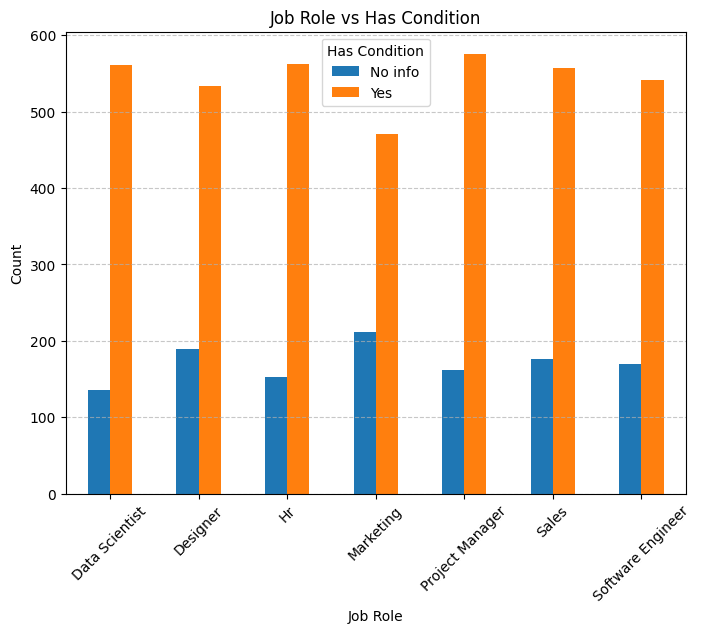

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar frecuencia de Has_condition por Job_Role
job_condition = health.groupby(['Job_Role', 'Has_condition']).size().unstack()

# Gráfico de barras agrupadas
job_condition.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Job Role vs Has Condition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Has Condition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [45]:
print(health.Satisfaction_with_Remote_Work.unique())
print(health.Work_Location.unique())

['Unsatisfied' 'Satisfied' 'Neutral']
['Hybrid' 'Remote' 'Onsite']


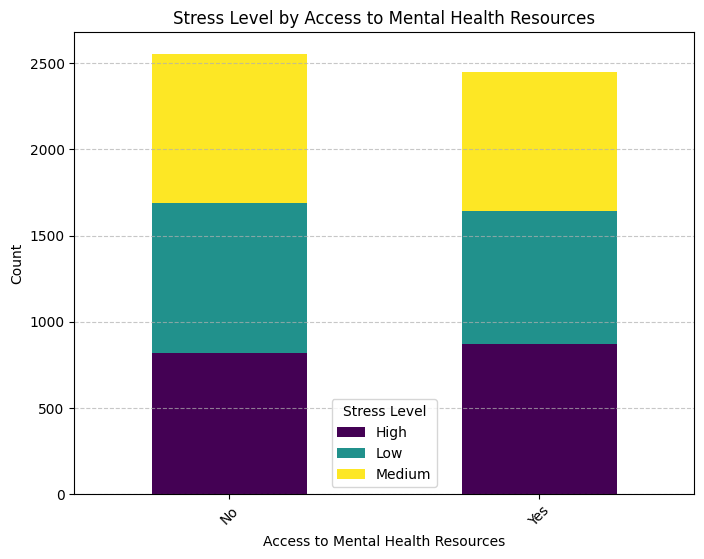

In [27]:
# Contar frecuencia de Stress_Level por Access_to_Mental_Health_Resources
stress_resources = health.groupby(['Access_to_Mental_Health_Resources', 'Stress_Level']).size().unstack()

# Gráfico de barras apiladas
stress_resources.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stress Level by Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stress Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

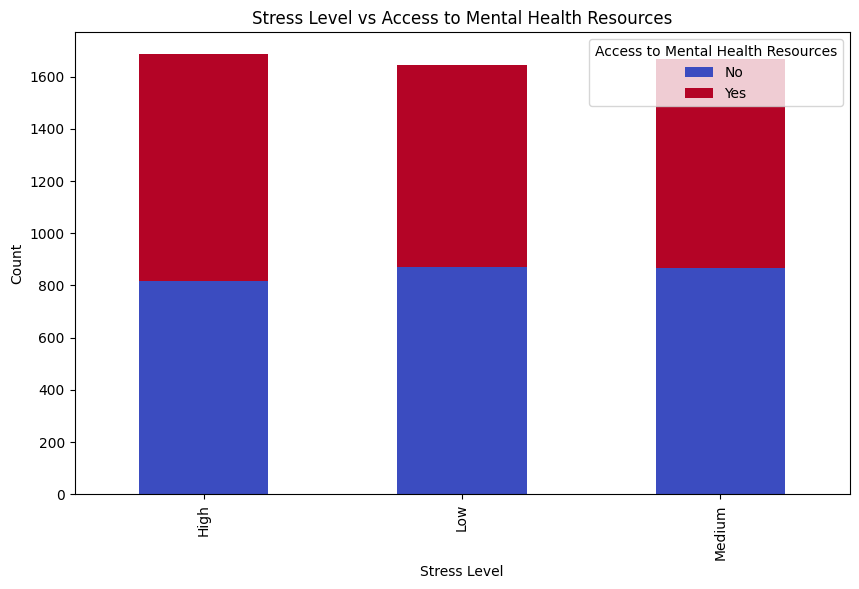

In [12]:
# Tabla de frecuencias
cross_tab = pd.crosstab(health['Stress_Level'], health['Access_to_Mental_Health_Resources'])

# Gráfico de barras apilado
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Stress Level vs Access to Mental Health Resources')
plt.ylabel('Count')
plt.xlabel('Stress Level')
plt.legend(title='Access to Mental Health Resources')
plt.show()

Productivity_Change  Decrease  Increase  No Change
Sleep_Quality                                     
Average                   565       522        541
Good                      560       516        611
Poor                      612       548        525


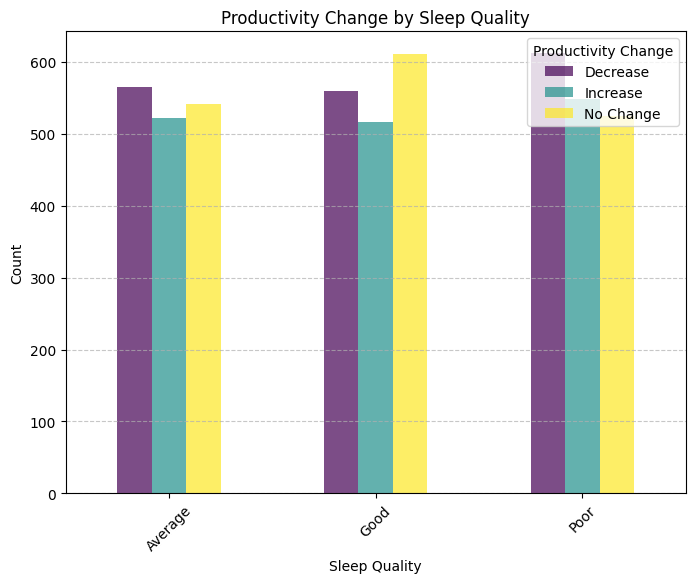

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos por 'Sleep_Quality' y 'Productivity_Change' y contamos las ocurrencias
prod_sleep = health.groupby(['Sleep_Quality', 'Productivity_Change']).size().unstack(fill_value=0)

# Confirmamos el contenido de prod_sleep
print(prod_sleep)

# Gráfico de barras agrupadas
prod_sleep.plot(kind='bar', figsize=(8, 6), colormap='viridis', alpha=0.7)
plt.title('Productivity Change by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Productivity Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


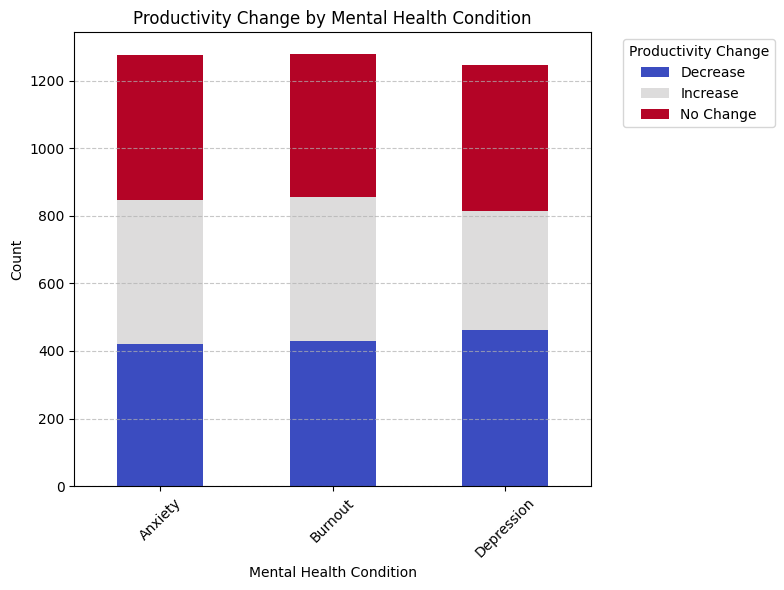

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear tabla de frecuencia cruzada entre Mental_Health_Condition y Productivity_Change
mh_prod_table = health.groupby(['Mental_Health_Condition', 'Productivity_Change']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
mh_prod_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Personalización del gráfico
plt.title('Productivity Change by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


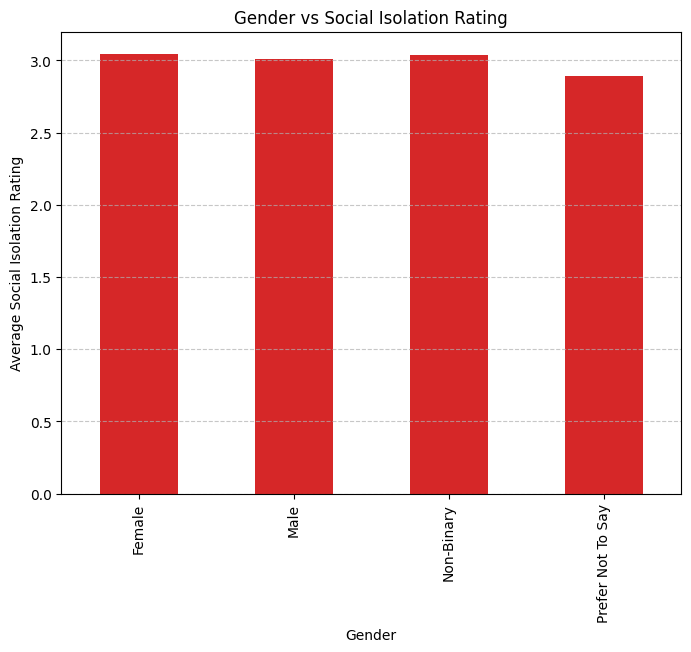

In [21]:
# Convertimos Social_Isolation_Rating a numérico
health['Social_Isolation_Rating'] = pd.to_numeric(health['Social_Isolation_Rating'], errors='coerce')

# Agrupamos por Gender y calculamos la media
isolation_gender = health.groupby('Gender')['Social_Isolation_Rating'].mean()

# Gráfico de barras
isolation_gender.plot(kind='bar', figsize=(8, 6), color='#d62728')
plt.title('Gender vs Social Isolation Rating')
plt.xlabel('Gender')
plt.ylabel('Average Social Isolation Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

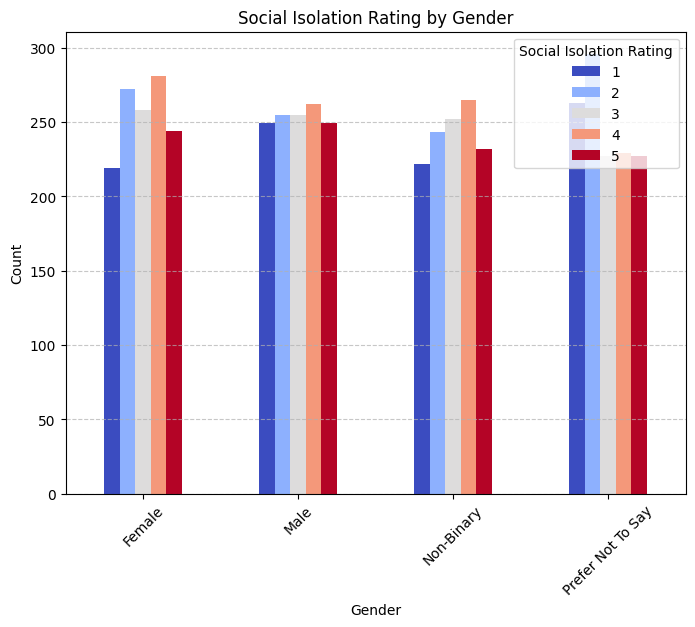

In [29]:
# Contar frecuencia de Social_Isolation_Rating por Gender
isolation_gender = health.groupby(['Gender', 'Social_Isolation_Rating']).size().unstack(fill_value=0)

# Gráfico de barras agrupadas
isolation_gender.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Social Isolation Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Social Isolation Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

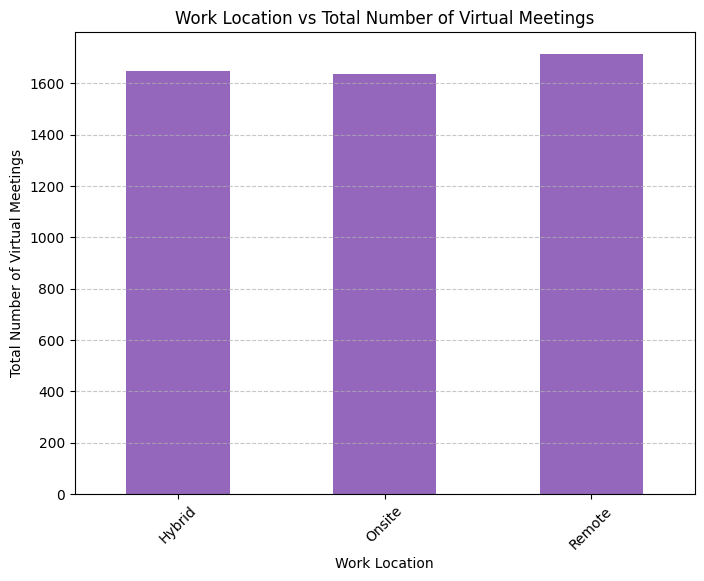

In [30]:
# Agrupamos por Work_Location y sumamos Number_of_Virtual_Meetings
meetings_location = health.groupby('Work_Location')['Number_of_Virtual_Meetings'].count()

# Gráfico de barras
meetings_location.plot(kind='bar', figsize=(8, 6), color='#9467bd')
plt.title('Work Location vs Total Number of Virtual Meetings')
plt.xlabel('Work Location')
plt.ylabel('Total Number of Virtual Meetings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

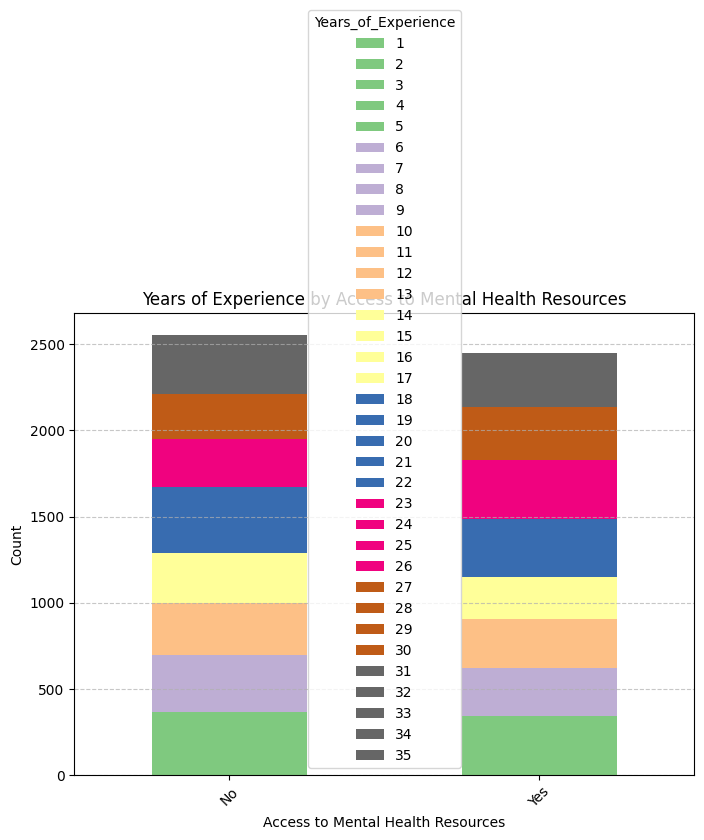

In [32]:
# Agrupamos por Access_to_Mental_Health_Resources y Years_of_Experience
resources_experience = health.groupby(['Access_to_Mental_Health_Resources', 'Years_of_Experience']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
resources_experience.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Accent')
plt.title('Years of Experience by Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.legend(title='Years of Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
